In [1]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import graphviz
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

import warnings
warnings.filterwarnings("ignore")
import prep

# Hypothesis

-The month in which a customer signs up will have an impact on the rate of churn.

-Features like internet service, type of phone service, online security and backup, senior citizens will affect the rate of churn.

-There will be a price point on some of the serves where churn will increse.

-The contract plan will affect the rate of churn.

# Acquisition

In [2]:
# Get churn data from customers table
df = pd.read_csv('telco_churn_customers.csv')
df = prep.prep_telco(df) # data prep from prep.py file

In [3]:
df.drop(columns='customer_id', axis=1, inplace=True)

In [4]:
df.head()

,senior_citizen,tenure,internet_service_type_id,contract_type_id,payment_type_id,monthly_charges,total_charges,churn,tenure_year,household_type_id,streaming_services,phone_id,online_security_backup,gender,device_protection,tech_support,paperless_billing
0,0,9,1,2,2,65.6,593.30,0,0.75,3,2,1,2,0,0,2,1
1,0,9,1,1,2,59.9,542.40,0,0.75,0,1,2,1,1,0,0,0
2,0,4,2,1,1,73.9,280.85,1,0.33,0,0,1,1,1,2,0,1
3,1,13,2,1,1,98.0,1237.85,1,1.08,2,3,1,2,1,2,0,1
4,1,3,2,1,2,83.9,267.40,1,0.25,2,2,1,1,0,0,2,1


Write a function, peekatdata(dataframe), that takes a dataframe as input and computes and returns the following:

creates dataframe object head_df (df of the first 5 rows) and prints contents to screen

creates dataframe object tail_df (df of the last 5 rows) and prints contents to screen

creates tuple object shape_tuple (tuple of (nrows, ncols)) and prints tuple to screen

creates dataframe object describe_df (summary statistics of all numeric variables) and prints contents to screen.

prints to screen the information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.

In [5]:
def peekatdata(dataframe):
    head_df = df.head()
    tail_df = df.tail()
    head_tail = head_df.append(tail_df)
    print('Head and Tail\n\n', head_tail)
    print('--'*55)
    shape_tuple = df.shape
    print('Shape\n\n', shape_tuple)
    print('--'*20)
    describe_df = df.describe()
    print('Describe\n\n', describe_df)
    print('--'*20)
    print('Index\n\n', df.index)
    print('--'*20)
    print('Data Types\n\n', df.dtypes)
    print('--'*20)
    print('Null Value Count\n\n', df.isnull().sum())
    print('--'*55)
    print('Memory\n\n', df.memory_usage)

# Data Preparation

In [6]:
def df_value_counts(df):
    for col in df.columns: 
        n = df[col].unique().shape[0] 
        col_bins = min(n,10) 
        if df[col].dtype in ['int64','float64'] and n > 10:
            print('%s:' % col)
            print(df[col].value_counts(bins=col_bins, sort=False)) 
        else: 
            print(df[col].value_counts()) 
        print('\n')

# df_value_counts(df)

## Missing Values

#### We only found a few missing values in the total_charges column where tenure was 0. There was an empty string in that field so we replaced it with a 0 since a customer with 0 tenure would have 0 total charges due. Could not find any other nulls or NaNs.



In [7]:
# Split the data into train (70%) & test (30%) samples.
X = df.drop(['churn'], axis=1)
y = df[['churn']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=123, stratify=y)

train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

X_train.head()

,senior_citizen,tenure,internet_service_type_id,contract_type_id,payment_type_id,monthly_charges,total_charges,tenure_year,household_type_id,streaming_services,phone_id,online_security_backup,gender,device_protection,tech_support,paperless_billing
4953,0,55,3,2,1,19.70,1140.05,4.58,2,0,1,0,0,1,1,0
534,1,66,2,2,3,108.10,7238.60,5.50,0,3,2,2,0,2,0,0
172,0,66,1,3,3,50.55,3364.55,5.50,3,3,0,1,1,0,2,0
3710,0,68,3,3,3,24.00,1664.30,5.67,3,0,2,0,1,1,1,1
1574,0,57,2,2,4,100.75,5985.00,4.75,2,3,2,1,0,2,0,1


In [8]:
# Numeric Scaling: scale the monthly_charges and total_charges data. Make sure that the parameters for scaling 
# are learned from the training data set.
scaler = MinMaxScaler()
scaler.fit(X_train[['monthly_charges', 'total_charges']])

X_train[['monthly_charges', 'total_charges']] = scaler.transform(X_train[['monthly_charges', 'total_charges']])
X_test[['monthly_charges', 'total_charges']] = scaler.transform(X_test[['monthly_charges', 'total_charges']])

train[['monthly_charges', 'total_charges']] = scaler.transform(train[['monthly_charges', 'total_charges']])
test[['monthly_charges', 'total_charges']] = scaler.transform(test[['monthly_charges', 'total_charges']])

# Data Exploration

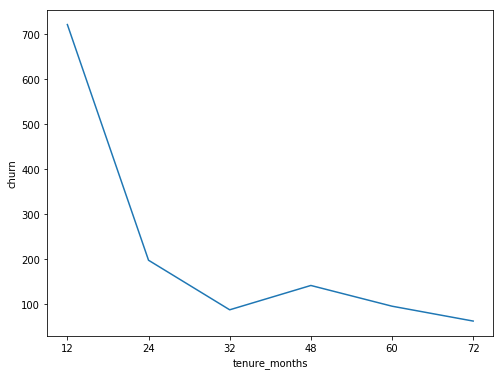

In [9]:
# Could the month in which they signed up influence churn? i.e. if a cohort is identified by tenure, is there a 
# cohort or cohorts who have a higher rate of churn than other cohorts? (Plot the rate of churn on a line chart 
# where x is the tenure and y is the rate of churn (customers churned/total customers)).

bins = [12, 24, 32, 48, 60, 72]
train['tenure_months'] = pd.cut(train['tenure'], bins)

bins = [0, 12, 24, 32, 48, 60, 72]
labels = ['12', '24', '32', '48', '60', '72']
train['tenure_months'] = pd.cut(train['tenure'], bins=bins, labels=labels).where(train.churn == 1)

df1 = train.groupby('tenure_months')['churn'].count()
df1 = pd.DataFrame(df1)
df1 = df1.reset_index()
df1

plt.figure(figsize=(8,6))
ax = sns.lineplot(x="tenure_months", y="churn",data=df1)

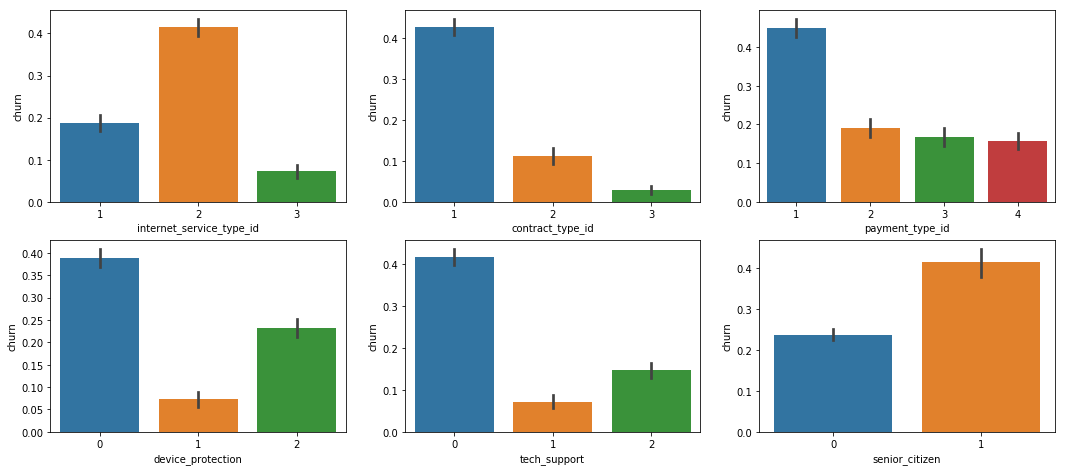

In [10]:
plt.figure(figsize=(18,12))

plt.subplot(331)
sns.barplot(x=train.internet_service_type_id, y=train.churn)

plt.subplot(332)
sns.barplot(x=train.contract_type_id, y=train.churn)

plt.subplot(333)
sns.barplot(x=train.payment_type_id, y=train.churn)

plt.subplot(334)
sns.barplot(x=train.device_protection, y=train.churn)

plt.subplot(335)
sns.barplot(x=train.tech_support, y=train.churn)

plt.subplot(336)
sns.barplot(x=train.senior_citizen, y=train.churn)

In [11]:
# If we looked at churn rate for month-to-month customers after the 12th month and that of 1-year contract customers
# after the 12th month, are those rates comparable?

mtm = train[train.contract_type_id == 1]
mtm_after12 = mtm[mtm.tenure_year > 1]

mtmc = mtm_after12.churn.value_counts()
mtmc

print('Rate of churn for month-to-month: {:.2%}'.format(mtmc[1]/(mtmc[0]+mtmc[1])))

one_year = train[train.contract_type_id == 2]
one_year_after12 = one_year[one_year.tenure_year > 1]

one_yearc = one_year_after12.churn.value_counts()
one_yearc

print('Rate of churn for 1+ years: {:.2%}'.format(one_yearc[1]/(one_yearc[0]+one_yearc[1])))

Rate of churn for month-to-month: 33.53%
Rate of churn for 1+ years: 11.48%


Controlling for services (phone_id, internet_service_type_id, online_security_backup, device_protection, tech_support, and contract_type_id), is the mean monthly_charges of those who have churned significantly different from that of those who have not churned? (Use a t-test to answer this.)

statistic: 13.57
pvalue: 3.18e-41
From the TTest we can conclude there is a significantly difference between the two.

In [12]:
# Getting customers who have duplicate services.

dups = train[train.duplicated(['phone_id', 
                               'internet_service_type_id', 
                               'online_security_backup',
                               'device_protection', 
                               'tech_support', 
                               'contract_type_id'],
                                keep=False)]

In [13]:
# Finding the monthly_charges for the ones who have churned/not

churn = dups.loc[dups['churn'] == 1]['monthly_charges']
no_churn = dups.loc[dups['churn'] == 0]['monthly_charges']

In [14]:
# T test on the mean monthly_charges
from scipy.stats import ttest_ind, pearsonr
ttest_ind(churn,no_churn)

Ttest_indResult(statistic=13.780089052045543, pvalue=2.039715011078695e-42)

In [15]:
pearsonr(train.monthly_charges, train.internet_service_type_id)

(-0.3236727414058814, 1.3145249985768094e-120)

In [16]:
# plt.figure(figsize=(20,20))
# sns.heatmap(train.corr(), annot=True, cmap='Greens')

In [17]:
# scatter = pd.scatter_matrix(
#     train.drop(['customer_id'], axis=1), marker='o', s=40,
#     hist_kwds={'bins':15},  figsize=(25,25))

In [18]:
# sns.swarmplot(data=train, x='contract_type_id', y='monthly_charges', hue='churn')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [19]:
# sns.pairplot(data=train)

In [20]:
# sns.relplot(data=train, x='tenure', y='total_charges', hue='churn')

In [21]:
# sns.boxplot(data=train[['monthly_charges', 'total_charges']])

In [22]:
# with sns.axes_style('white'):
#     j = sns.jointplot("monthly_charges", "churn", data=train, kind='reg', height=5);
#     j.annotate(pearsonr)
# plt.show()

In [23]:
# g = sns.PairGrid(train)
# g.map_diag(plt.hist)
# g.map_offdiag(plt.scatter);

In [24]:
train['cumsum_churn'] = train.churn.cumsum()

In [25]:
train['rate_churn'] = train.cumsum_churn/train.churn.count()

In [26]:
pd.crosstab(train.churn, train.contract_type_id, margins=True, normalize=True).style.background_gradient(cmap='YlOrRd')


contract_type_id,1,2,3,All
churn,,,,
0,0.315822,0.187627,0.231237,0.734686
1,0.235091,0.0235294,0.00669371,0.265314
All,0.550913,0.211156,0.237931,1


In [27]:
pd.crosstab(train.churn, train.internet_service_type_id, margins=True, normalize=True).style.background_gradient(cmap='YlOrRd')


internet_service_type_id,1,2,3,All
churn,,,,
0,0.2714,0.263286,0.2,0.734686
1,0.0624746,0.187221,0.0156187,0.265314
All,0.333874,0.450507,0.215619,1


In [28]:
pd.crosstab(train.churn, train.senior_citizen, margins=True, normalize=True).style.background_gradient(cmap='YlOrRd')


senior_citizen,0,1,All
churn,,,
0,0.639554,0.0951318,0.734686
1,0.197972,0.0673428,0.265314
All,0.837525,0.162475,1


In [29]:
pd.crosstab(train.churn, train.household_type_id, margins=True, normalize=True).style.background_gradient(cmap='YlOrRd')


household_type_id,0,1,2,3,All
churn,,,,,
0,0.30142,0.0381339,0.17931,0.215822,0.734686
1,0.157404,0.0119675,0.0604462,0.035497,0.265314
All,0.458824,0.0501014,0.239757,0.251318,1


In [30]:
pd.crosstab(train.churn, train.gender, margins=True, normalize=True).style.background_gradient(cmap='YlOrRd')


gender,0,1,All
churn,,,
0,0.366734,0.367951,0.734686
1,0.132049,0.133266,0.265314
All,0.498783,0.501217,1


In [31]:
pd.crosstab(train.churn, train.tech_support, margins=True, normalize=True).style.background_gradient(cmap='YlOrRd')


tech_support,0,1,2,All
churn,,,,
0,0.290467,0.2,0.244219,0.734686
1,0.207708,0.0156187,0.0419878,0.265314
All,0.498174,0.215619,0.286207,1


In [32]:
pd.crosstab(train.churn, train.device_protection, margins=True, normalize=True).style.background_gradient(cmap='YlOrRd')


device_protection,0,1,2,All
churn,,,,
0,0.264706,0.2,0.26998,0.734686
1,0.168357,0.0156187,0.0813387,0.265314
All,0.433063,0.215619,0.351318,1


In [33]:
pd.crosstab(train.churn, train.paperless_billing, margins=True, normalize=True).style.background_gradient(cmap='YlOrRd')


paperless_billing,0,1,All
churn,,,
0,0.339757,0.394929,0.734686
1,0.0649087,0.200406,0.265314
All,0.404665,0.595335,1


In [34]:
pd.crosstab(train.churn, train.phone_id, margins=True, normalize=True).style.background_gradient(cmap='YlOrRd')


phone_id,0,1,2,All
churn,,,,
0,0.0693712,0.358824,0.306491,0.734686
1,0.0235294,0.121095,0.12069,0.265314
All,0.0929006,0.479919,0.427181,1


In [35]:
pd.crosstab(train.churn, train.streaming_services, margins=True, normalize=True).style.background_gradient(cmap='YlOrRd')


streaming_services,0,1,2,3,All
churn,,,,,
0,0.383976,0.0770791,0.0758621,0.197769,0.734686
1,0.113387,0.0361055,0.03286,0.0829615,0.265314
All,0.497363,0.113185,0.108722,0.28073,1


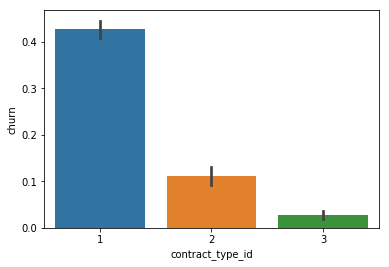

In [36]:
# barplot
ax = sns.barplot(x="contract_type_id", y="churn", data=train)

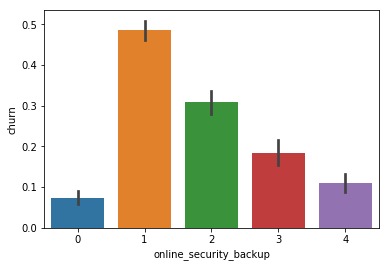

In [37]:
# barplot
ax = sns.barplot(x="online_security_backup", y="churn", data=train)

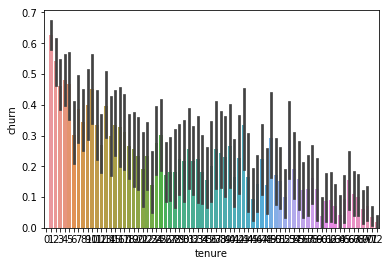

In [38]:
# barplot
ax = sns.barplot(x="tenure", y="churn", data=train)

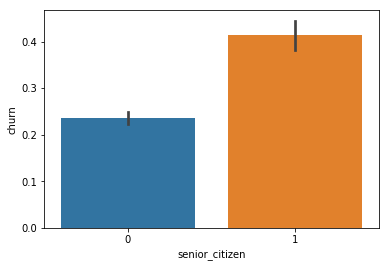

In [40]:
# barplot
ax = sns.barplot(x="senior_citizen", y="churn", data=train)

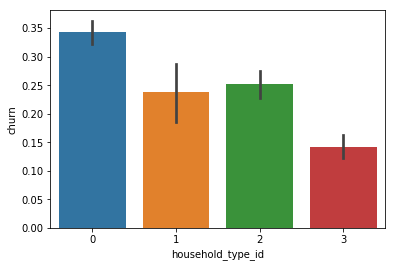

In [41]:
# barplot
ax = sns.barplot(x="household_type_id", y="churn", data=train)

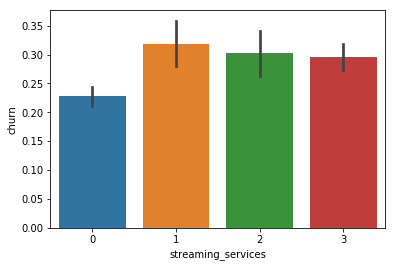

In [42]:
# barplot
ax = sns.barplot(x="streaming_services", y="churn", data=train)

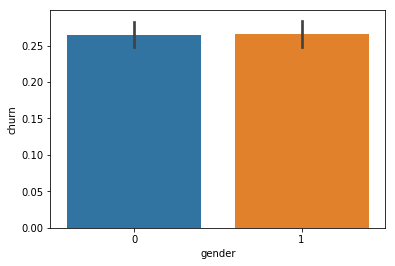

In [43]:
# barplot
ax = sns.barplot(x="gender", y="churn", data=train)

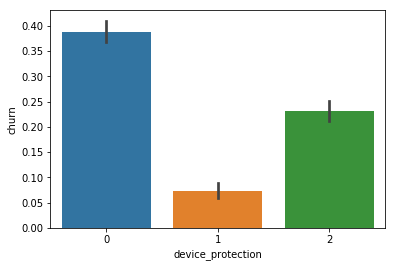

In [44]:
# barplot
ax = sns.barplot(x="device_protection", y="churn", data=train)

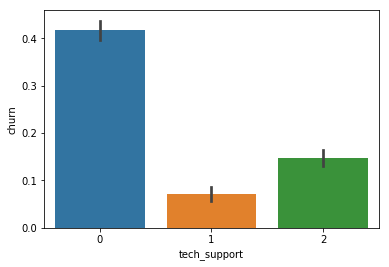

In [45]:
# barplot
ax = sns.barplot(x="tech_support", y="churn", data=train)

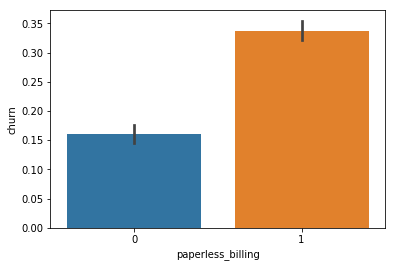

In [46]:
# barplot
ax = sns.barplot(x="paperless_billing", y="churn", data=train)

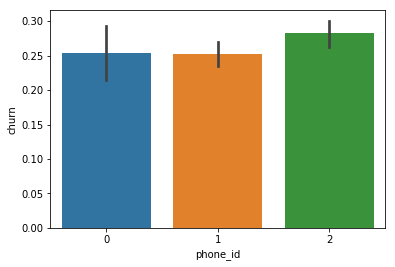

In [47]:
# barplot
ax = sns.barplot(x="phone_id", y="churn", data=train)

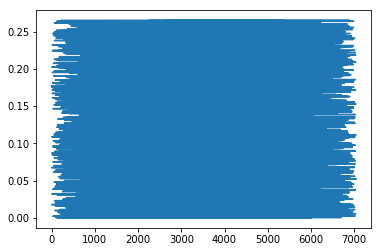

In [48]:
train.rate_churn.plot()

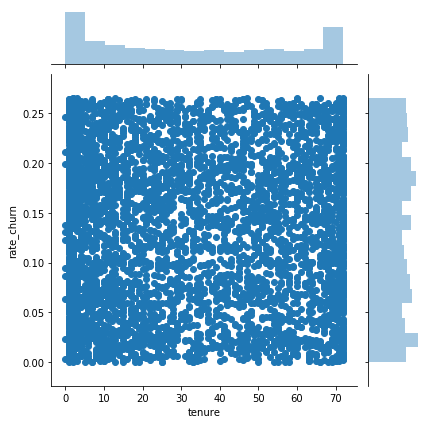

In [49]:
# joint plot
sns.jointplot(x=train.tenure, y=train.rate_churn, data=train)

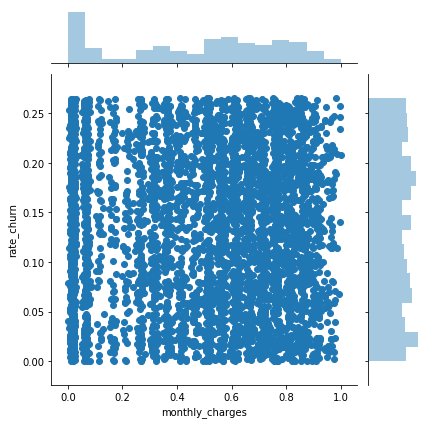

In [50]:
# joint plot
sns.jointplot(x=train.monthly_charges, y=train.rate_churn, data=train)

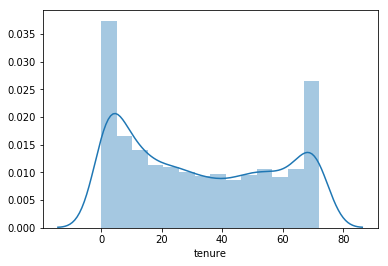

In [51]:
sns.distplot(train.tenure)

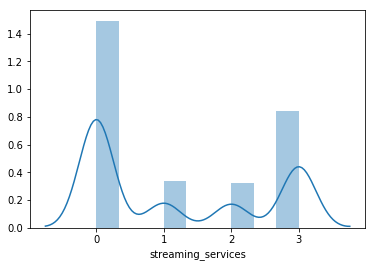

In [52]:
sns.distplot(train.streaming_services)

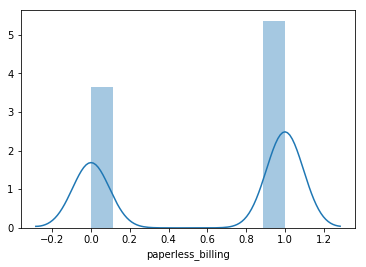

In [53]:
sns.distplot(train.paperless_billing)

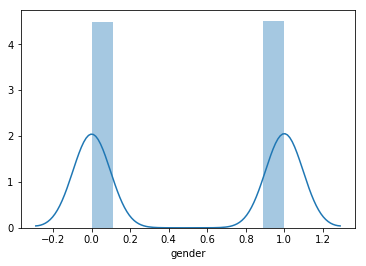

In [54]:
sns.distplot(train.gender)

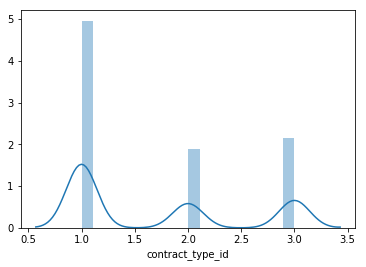

In [55]:
sns.distplot(train.contract_type_id)

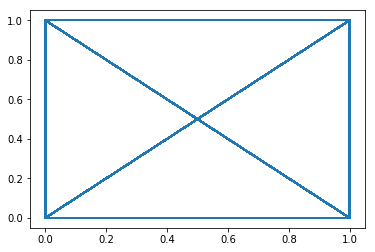

In [56]:
# plt.plot
plt.plot('gender', 'churn', data=train)

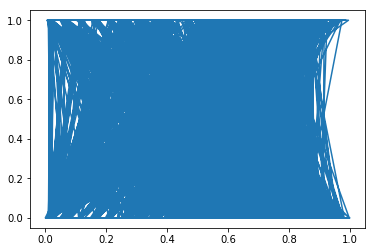

In [57]:
# plt.plot
plt.plot('monthly_charges', 'churn', data=train)

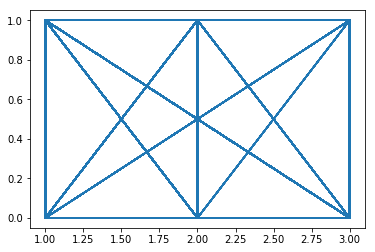

In [58]:
# plt.plot
plt.plot('contract_type_id', 'churn', data=train)

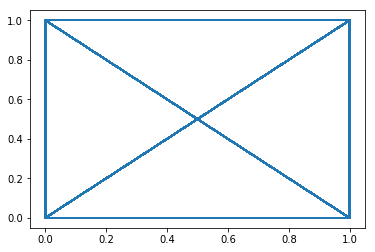

In [59]:
# plt.plot
plt.plot('paperless_billing', 'churn', data=train)

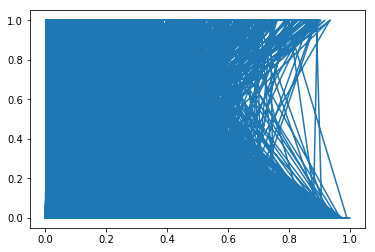

In [60]:
# plt.plot
plt.plot('total_charges', 'churn', data=train)

What can you say about each variable's relationship to churn, based on your initial exploration? If there appears
to be some sort of interaction or correlation, assume there is no causal relationship and brainstorm (and document)ideas on reasons there could be correlation.

-According to the above, the variables that do not have a strong enough correlation are gender, steaming services, house type, and phone_id. We will drop these for our analysis.

-The variables that do have a significant effect on churn rate are internet_service_type_id, contract_type_id, payment_type_id, device_protection, tech_support, and senior_citizen. We will focus on these fetures.

-internet_service_type_id: Faster plans have higher cost and higher monthly bills drive churn.

-contract_type_id: month to month have the freedom to churn whenever so if they have higher monthly bills they are free to leave.
-payment_type_id:

-device_protection: Broken devices can lead them to leave

-tech_support: No support can leadto frustration and cause them to churn

#senior_citizen: More likely to stop service for health/moving issues.


# Feature Engineering

In [61]:
train.drop(columns= ['total_charges', 
           'tenure_year', 
           'household_type_id', 
           'streaming_services', 
           'phone_id', 
           'online_security_backup',
           'gender',
           'cumsum_churn',
           'rate_churn',
           'tenure_months',
           'churn'], axis=1, inplace=True)

In [62]:
train.head()

,senior_citizen,tenure,internet_service_type_id,contract_type_id,payment_type_id,monthly_charges,device_protection,tech_support,paperless_billing
4953,0,55,3,2,1,0.014428,1,1,0
534,1,66,2,2,3,0.894030,2,0,0
172,0,66,1,3,3,0.321393,0,2,0
3710,0,68,3,3,3,0.057214,1,1,1
1574,0,57,2,2,4,0.820896,2,0,1


In [63]:
y_train.shape

(4930, 1)

In [64]:
train.columns

Index(['senior_citizen', 'tenure', 'internet_service_type_id',
       'contract_type_id', 'payment_type_id', 'monthly_charges',
       'device_protection', 'tech_support', 'paperless_billing'],
      dtype='object')

# Logistic Regression Model 1

In [65]:
logis = LogisticRegression()
logis.fit(train, y_train)
y_pred_logis = logis.predict(train)
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logis.score(train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.79


In [66]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_pred_logis)
print(cm)

[[3237  385]
 [ 636  672]]


In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_logis))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      3622
           1       0.64      0.51      0.57      1308

   micro avg       0.79      0.79      0.79      4930
   macro avg       0.74      0.70      0.72      4930
weighted avg       0.78      0.79      0.79      4930



In [68]:
tn = cm[0,0]
tp = cm[1,1]
fn = cm[1,0]
fp = cm[0,1]
total = cm.sum()
accuracy = ((tn + tp)/total)*100
print((fp/total)*100)
print((fn/total)*100)

7.809330628803246
12.900608519269777


# Logistic Regression Model 2

In [69]:
logis = LogisticRegression(random_state=123)
logis.fit(train[['monthly_charges', 'tenure']], y_train)
y_pred_logis = logis.predict(train[['monthly_charges', 'tenure']])
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logis.score(train[['monthly_charges', 'tenure']], y_train)))


Accuracy of Logistic Regression classifier on training set: 0.78


In [70]:
cm = confusion_matrix(y_train, y_pred_logis)
print(cm)

[[3295  327]
 [ 733  575]]


In [71]:
print(classification_report(y_train, y_pred_logis))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      3622
           1       0.64      0.44      0.52      1308

   micro avg       0.78      0.78      0.78      4930
   macro avg       0.73      0.67      0.69      4930
weighted avg       0.77      0.78      0.77      4930



In [72]:
# Finding the FP & FN rates
tn = cm[0,0]
tp = cm[1,1]
fn = cm[1,0]
fp = cm[0,1]
total = cm.sum()
accuracy = ((tn + tp)/total)*100
print((fp/total)*100)
print((fn/total)*100)

6.632860040567952
14.868154158215011


In [73]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logis.score(test[['monthly_charges', 'tenure']], y_test)))

Accuracy of Logistic Regression classifier on training set: 0.79


# Logisitic Regression Model 3

In [74]:
train.columns

Index(['senior_citizen', 'tenure', 'internet_service_type_id',
       'contract_type_id', 'payment_type_id', 'monthly_charges',
       'device_protection', 'tech_support', 'paperless_billing'],
      dtype='object')

In [75]:
logis = LogisticRegression(random_state=123)
logis.fit(train[['monthly_charges', 'tenure','senior_citizen']], y_train)
y_pred_logis = logis.predict(train[['monthly_charges', 'tenure','senior_citizen']])
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logis.score(train[['monthly_charges', 'tenure','senior_citizen']], y_train)))


Accuracy of Logistic Regression classifier on training set: 0.79


In [76]:
cm = confusion_matrix(y_train, y_pred_logis)
print(cm)

[[3305  317]
 [ 723  585]]


In [77]:
print(classification_report(y_train, y_pred_logis))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      3622
           1       0.65      0.45      0.53      1308

   micro avg       0.79      0.79      0.79      4930
   macro avg       0.73      0.68      0.70      4930
weighted avg       0.77      0.79      0.78      4930



In [78]:
# Finding the FP & FN rates
tn = cm[0,0]
tp = cm[1,1]
fn = cm[1,0]
fp = cm[0,1]
total = cm.sum()
accuracy = ((tn + tp)/total)*100
print((fp/total)*100)
print((fn/total)*100)

6.43002028397566
14.665314401622718


In [79]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logis.score(test[['monthly_charges', 'tenure','senior_citizen']], y_test)))

Accuracy of Logistic Regression classifier on training set: 0.80


# Logistic Regression Model 4

In [80]:
logis = LogisticRegression(random_state=123)
logis.fit(train[['monthly_charges', 'tenure','contract_type_id']], y_train)
y_pred_logis = logis.predict(train[['monthly_charges', 'tenure','contract_type_id']])
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logis.score(train[['monthly_charges', 'tenure','contract_type_id']], y_train)))

Accuracy of Logistic Regression classifier on training set: 0.79


In [81]:
cm = confusion_matrix(y_train, y_pred_logis)
print(cm)

[[3243  379]
 [ 677  631]]


In [82]:
print(classification_report(y_train, y_pred_logis))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      3622
           1       0.62      0.48      0.54      1308

   micro avg       0.79      0.79      0.79      4930
   macro avg       0.73      0.69      0.70      4930
weighted avg       0.77      0.79      0.78      4930



In [83]:
# Finding the FP & FN rates
tn = cm[0,0]
tp = cm[1,1]
fn = cm[1,0]
fp = cm[0,1]
total = cm.sum()
accuracy = ((tn + tp)/total)*100
print((fp/total)*100)
print((fn/total)*100)

7.687626774847871
13.732251521298174


In [84]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logis.score(test[['monthly_charges', 'tenure','contract_type_id']], y_test)))

Accuracy of Logistic Regression classifier on training set: 0.79


# Logistic Regression Model 5

In [85]:
logis = LogisticRegression(random_state=123)
logis.fit(train[['monthly_charges', 'tenure','tech_support']], y_train)
y_pred_logis = logis.predict(train[['monthly_charges', 'tenure','tech_support']])
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logis.score(train[['monthly_charges', 'tenure','tech_support']], y_train)))

Accuracy of Logistic Regression classifier on training set: 0.79


In [86]:
cm = confusion_matrix(y_train, y_pred_logis)
print(cm)

[[3272  350]
 [ 701  607]]


In [87]:
print(classification_report(y_train, y_pred_logis))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      3622
           1       0.63      0.46      0.54      1308

   micro avg       0.79      0.79      0.79      4930
   macro avg       0.73      0.68      0.70      4930
weighted avg       0.77      0.79      0.78      4930



In [88]:
# Finding the FP & FN rates
tn = cm[0,0]
tp = cm[1,1]
fn = cm[1,0]
fp = cm[0,1]
total = cm.sum()
accuracy = ((tn + tp)/total)*100
print((fp/total)*100)
print((fn/total)*100)

7.099391480730223
14.219066937119676


In [89]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logis.score(test[['monthly_charges', 'tenure','tech_support']], y_test)))

Accuracy of Logistic Regression classifier on training set: 0.79


# Decision Tree Model 1

In [90]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(train, y_train)
y_pred_dtc = dtc.predict(train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(dtc.score(train, y_train)))

Accuracy of Decision Tree classifier on training set: 1.00


In [91]:
print(confusion_matrix(y_train, y_pred_dtc))

[[3620    2]
 [  17 1291]]


In [92]:
print(classification_report(y_train, y_pred_dtc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3622
           1       1.00      0.99      0.99      1308

   micro avg       1.00      1.00      1.00      4930
   macro avg       1.00      0.99      1.00      4930
weighted avg       1.00      1.00      1.00      4930



# Decision Tree Model 2

In [93]:
dtc = DecisionTreeClassifier()
dtc.fit(train[['tenure',
       'contract_type_id',
       'device_protection', 'tech_support', 'monthly_charges']], y_train)
y_pred_dtc = dtc.predict(train[['tenure',
       'contract_type_id',
       'device_protection', 'tech_support', 'monthly_charges']])
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(dtc.score(train[['tenure',
       'contract_type_id',
       'device_protection', 'tech_support', 'monthly_charges']], y_train)))

Accuracy of Decision Tree classifier on training set: 0.99


In [94]:
print(confusion_matrix(y_train, y_pred_dtc))

[[3610   12]
 [  54 1254]]


In [95]:
print(classification_report(y_train, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3622
           1       0.99      0.96      0.97      1308

   micro avg       0.99      0.99      0.99      4930
   macro avg       0.99      0.98      0.98      4930
weighted avg       0.99      0.99      0.99      4930



# Random Forest Model 1

In [96]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(train, y_train)
y_pred_rfc = rfc.predict(train)
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rfc.score(train, y_train)))

Accuracy of random forest classifier on training set: 0.97


In [97]:
print(confusion_matrix(y_train, y_pred_rfc))

[[3596   26]
 [ 101 1207]]


In [98]:
print(classification_report(y_train, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3622
           1       0.98      0.92      0.95      1308

   micro avg       0.97      0.97      0.97      4930
   macro avg       0.98      0.96      0.97      4930
weighted avg       0.97      0.97      0.97      4930



# Random Forest Model 2

In [99]:
rfc = RandomForestClassifier()
rfc.fit(train[['tenure',
       'contract_type_id',
       'device_protection', 'tech_support', 'monthly_charges']], y_train)
y_pred_rfc = rfc.predict(train[['tenure',
       'contract_type_id',
       'device_protection', 'tech_support', 'monthly_charges']])
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rfc.score(train[['tenure',
       'contract_type_id',
       'device_protection', 'tech_support', 'monthly_charges']], y_train)))

Accuracy of random forest classifier on training set: 0.97


In [100]:
print(confusion_matrix(y_train, y_pred_rfc))

[[3572   50]
 [ 115 1193]]


In [101]:
print(classification_report(y_train, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3622
           1       0.96      0.91      0.94      1308

   micro avg       0.97      0.97      0.97      4930
   macro avg       0.96      0.95      0.96      4930
weighted avg       0.97      0.97      0.97      4930



# KNN Model 1

In [102]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(train, y_train)
y_pred_knn = knn.predict(train)
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(train, y_train)))

Accuracy of KNN classifier on training set: 0.84


In [103]:
print(confusion_matrix(y_train, y_pred_knn))

[[3322  300]
 [ 489  819]]


In [104]:
print(classification_report(y_train, y_pred_knn))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      3622
           1       0.73      0.63      0.67      1308

   micro avg       0.84      0.84      0.84      4930
   macro avg       0.80      0.77      0.78      4930
weighted avg       0.83      0.84      0.84      4930



# KNN Model 2

In [109]:
train.columns

Index(['senior_citizen', 'tenure', 'internet_service_type_id',
       'contract_type_id', 'payment_type_id', 'monthly_charges',
       'device_protection', 'tech_support', 'paperless_billing'],
      dtype='object')

In [116]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(train[['tenure',
       'monthly_charges','contract_type_id']], y_train)
y_pred_knn = knn.predict(train[['tenure',
       'monthly_charges','contract_type_id']])
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(train[['tenure',
       'monthly_charges','contract_type_id']], y_train)))

Accuracy of KNN classifier on training set: 0.84


In [117]:
print(confusion_matrix(y_train, y_pred_knn))

[[3319  303]
 [ 502  806]]


In [118]:
print(classification_report(y_train, y_pred_knn))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      3622
           1       0.73      0.62      0.67      1308

   micro avg       0.84      0.84      0.84      4930
   macro avg       0.80      0.77      0.78      4930
weighted avg       0.83      0.84      0.83      4930



In [108]:
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import classification_report

# #create
# logit = LogisticRegression()
# print(logit)

# #fit
# logit.fit(train[['tenure', 'internet_service_type_id', 'monthly_charges', 'contract_type_id', 'phone_id']], train.churn)

# #predict
# print(logit.predict_proba(train[['tenure_year', 'internet_service_type_id', 'monthly_charges', 'contract_type_id', 'phone_id']]))

# train['prediction']= logit.predict(train[['tenure_year', 'internet_service_type_id', 'monthly_charges', 'contract_type_id', 'phone_id']])

# #evaluate
# print(logit.score(train[['tenure_year', 'internet_service_type_id', 'monthly_charges', 'contract_type_id', 'phone_id']], train.churn))

# cm = confusion_matrix(train.churn, train.prediction)
# print(cm)

# print(classification_report(train.churn, train.prediction))

# print(train.churn.value_counts())

# print(train.prediction.value_counts())

# print('Accuracy:', (train.churn == train.prediction).sum() / train.shape[0])


